In [1]:
import glob
import oyaml as yaml
import numpy as np
import pandas as pd
import dftools

Welcome to JupyROOT 6.18/00


In [2]:
import zinv
help(zinv.modules.analyse)

Help on function analyse in module zinv.modules.analyse:

analyse(dataset_cfg, sequence_cfg, event_selection_cfg, physics_object_cfg, trigger_cfg, hdf_cfg, name='zinv', outdir='output', tempdir='_ccsp_temp', mode='multiprocessing', batch_opts='-q hep.q', ncores=0, nblocks_per_dataset=-1, nblocks_per_process=-1, nfiles_per_dataset=-1, nfiles_per_process=1, blocksize=1000000, cachesize=8, quiet=False, sample=None)



In [3]:
help(zinv.modules.resume)

Help on function resume in module zinv.modules.resume:

resume(path, batch_opts='-q hep.q', sleep=5, request_resubmission_options=True)



In [4]:
#zinv.modules.analyse(
#    "configs/datasets.yaml",
#    "configs/module_sequence.yaml",
#    "configs/event_selection.yaml",
#    "configs/object_selection.yaml",
#    "configs/trigger_selection.yaml",
#    "configs/hdf_output.yaml",
#    outdir="/vols/cms/sdb15/Analysis/ZinvWidth/databases/2019/08_Aug/28_Legacy/Data",
#    tempdir="/vols/cms/sdb15/_ccsp_temp/",
#    mode="sge",
#    batch_opts="-q hep.q -l h_rt=3:0:0 -l h_vmem=24G",
#    #mode="multiprocessing",
#    #ncores=0,
#    nblocks_per_process=4,
#    blocksize=1_000_000,
#    sample="data",
#)

#zinv.modules.resume(
#    "/vols/cms/sdb15/_ccsp_temp/tpd_20190828_211305_2ursnd44",
#    batch_opts="-q hep.q -pe hep.pe 2 -l h_rt=3:0:0 -l h_vmem=24G",
#    request_resubmission_options=False,
#)

pass

In [5]:
#zinv.modules.analyse(
#    "configs/nominal/datasets.yaml",
#    "configs/nominal/module_sequence.yaml",
#    "configs/nominal/event_selection.yaml",
#    "configs/nominal/object_selection.yaml",
#    "configs/nominal/trigger_selection.yaml",
#    "configs/nominal/hdf_output.yaml",
#    outdir="/vols/cms/sdb15/Analysis/ZinvWidth/databases/2019/08_Aug/28_Legacy/MC",
#    tempdir="/vols/cms/sdb15/_ccsp_temp/",
#    mode="sge",
#    batch_opts="-q hep.q -l h_rt=3:0:0 -l h_vmem=24G",
#    #mode="multiprocessing",
#    #ncores=0,
#    nblocks_per_process=4,
#    blocksize=1_000_000,
#    sample="MC",
#)
#
#zinv.modules.resume(
#    "/vols/cms/sdb15/_ccsp_temp/tpd_20190815_142352_3g0w1x_t",
#    batch_opts="-q hep.q -l h_rt=3:0:0 -l h_vmem=24G",
#)

pass

## MET Skims

In [6]:
import zdb
help(zdb.modules.skim)

Help on function skim in module zdb.modules.skim:

skim(config, mode='multiprocessing', ncores=0, nfiles=-1, batch_opts='', output=None)



In [7]:
!cat configs/met_skim/cfg_data.yaml | head -n 10

cat: configs/met_skim/cfg_data.yaml: No such file or directory


In [8]:
selection = [
    "IsCertified",
    "Flag_goodVertices",
    "Flag_globalSuperTightHalo2016Filter",
    "Flag_HBHENoiseFilter",
    "Flag_HBHENoiseIsoFilter",
    "Flag_EcalDeadCellTriggerPrimitiveFilter",
    "Flag_BadPFMuonFilter",
    "MET_dCaloMET<0.6",
    "nJetSelection>0",
    "nJetSelection==nJetVeto",
    "LeadJetSelection_pt>200.",
    "LeadJetSelection_chHEF>0.1",
    "LeadJetSelection_neHEF<0.8",
    "nPhotonVeto==0",
    "nBJetVeto==0",
] 

cfg = {
    "selection": "(" + ") & (".join(selection) + ")",
    "tables": {"central": "Events"},
    "files": sorted(p for p in glob.glob("/vols/cms/sdb15/Analysis/ZinvWidth/databases/2019/08_Aug/28_Legacy/Data/*.h5"))
}
with open("configs/skims/data.yaml", "w") as f:
    yaml.dump(cfg, f, indent=4)

In [9]:
!cat configs/skims/data.yaml | head -n 10

selection: (IsCertified) & (Flag_goodVertices) & (Flag_globalSuperTightHalo2016Filter)
    & (Flag_HBHENoiseFilter) & (Flag_HBHENoiseIsoFilter) & (Flag_EcalDeadCellTriggerPrimitiveFilter)
    & (Flag_BadPFMuonFilter) & (MET_dCaloMET<0.6) & (nJetSelection>0) & (nJetSelection==nJetVeto)
    & (LeadJetSelection_pt>200.) & (LeadJetSelection_chHEF>0.1) & (LeadJetSelection_neHEF<0.8)
    & (nPhotonVeto==0) & (nBJetVeto==0)
tables:
    central: Events
files:
- /vols/cms/sdb15/Analysis/ZinvWidth/databases/2019/08_Aug/28_Legacy/Data/result_00000.h5
- /vols/cms/sdb15/Analysis/ZinvWidth/databases/2019/08_Aug/28_Legacy/Data/result_00001.h5
cat: write error: Broken pipe


In [10]:
help(zdb.modules.skim)

Help on function skim in module zdb.modules.skim:

skim(config, mode='multiprocessing', ncores=0, nfiles=-1, batch_opts='', output=None)



In [11]:
!mkdir -p results/skims/Data/

In [ ]:
zdb.modules.skim(
    "configs/skims/data.yaml",
    mode="multiprocessing",
    ncores=8,
    #mode='sge',
    #ncores=100,
    #batch_opts='-q hep.q',
    output="/vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/corrections/triggers/results/skims/Data/result_{:05d}.h5",
)

In [21]:
hists = ["METnoX_pt", "LeadMuonSelection_pt"]
hists_def = {
    "METnoX_pt": [
        {"table": "df: '{table_name}'"},
        {"varname0": "df: 'METnoX_pt'"},
        {"selection": "df: '{selection_name}'"},
        {"SingleMuonTriggered": "df: df.SingleMuonTriggered"},
        {"METTriggered": "df: df.METTriggered"},
        {"parent": "df: df.parent"},
        {"binvar0": "df: df.METnoX_pt_bin"},
        {"count": "df: 1."},
        {"sum_w": "df: {weight}"},
        {"sum_ww": "df: df.sum_w**2"},
    ],
    "LeadMuonSelection_pt": [
        {"table": "df: '{table_name}'"},
        {"varname0": "df: 'LeadMuonSelection_pt'"},
        {"selection": "df: '{selection_name}'"},
        {"SingleMuonTriggered": "df: df.SingleMuonTriggered"},
        {"METTriggered": "df: df.METTriggered"},
        {"parent": "df: df.parent"},
        {"binvar0": "df: df.LeadMuonSelection_pt_bin"},
        {"count": "df: 1."},
        {"sum_w": "df: {weight}"},
        {"sum_ww": "df: df.sum_w**2"},
    ],
}

cutflows = {
    "Monojet": {
        "selection_name": "Monojet",
        "selection": "(" + ") & (".join(
            selection + ["MinDPhiJ1234METnoX>0.5", "nMuonVeto==0", "nElectronVeto==0", "nTauVeto==0"]
        ) + ")",
        "weight": "1.",
        "hists": hists,
    },
    "SingleMuon": {
        "selection_name": "SingleMuon",
        "selection": "(" + ") & (".join(
            selection + ["MinDPhiJ1234METnoX>0.5", "nMuonVeto==1", "nElectronVeto==0", "nTauVeto==0", "nMuonSelection==1"]
        ) + ")",
        "weight": "1.",
        "hists": hists,
    },
    "DoubleMuon": {
        "selection_name": "DoubleMuon",
        "selection": "(" + ") & (".join(
            selection + ["MinDPhiJ1234METnoX>0.5", "nMuonVeto==2", "nElectronVeto==0", "nTauVeto==0", "nMuonSelection==2"]
        ) + ")",
        "weight": "1.",
        "hists": hists,
    },
    "TripleMuon": {
        "selection_name": "TripleMuon",
        "selection": "(" + ") & (".join(
            selection + ["MinDPhiJ1234METnoX>0.5", "nMuonVeto==3", "nElectronVeto==0", "nTauVeto==0", "nMuonSelection==3"]
        ) + ")",
        "weight": "1.",
        "hists": hists,
    },
    "SingleMuonMET": {
        "selection_name": "SingleMuonMET",
        "selection": "(" + ") & (".join(
            selection + ["METnoX_pt>200.", "MinDPhiJ1234METnoX>0.5", "nMuonVeto==1", "nElectronVeto==0", "nTauVeto==0", "nMuonSelection==1"]
        ) + ")",
        "weight": "1.",
        "hists": hists,
    },
    "DoubleMuonMET": {
        "selection_name": "DoubleMuonMET",
        "selection": "(" + ") & (".join(
            selection + ["METnoX_pt>200.", "MinDPhiJ1234METnoX>0.5", "nMuonVeto==2", "nElectronVeto==0", "nTauVeto==0", "nMuonSelection==2"]
        ) + ")",
        "weight": "1.",
        "hists": hists,
    },
}

met_triggers = [
    "df.HLT_PFMETNoMu90_PFMHTNoMu90_IDTight",
    "df.HLT_PFMETNoMu100_PFMHTNoMu100_IDTight",
    "df.HLT_PFMETNoMu110_PFMHTNoMu110_IDTight",
    "df.HLT_PFMETNoMu120_PFMHTNoMu120_IDTight",
#    "df.HLT_PFMET90_PFMHT90_IDTight",
#    "df.HLT_PFMET100_PFMHT100_IDTight",
#    "df.HLT_PFMET110_PFMHT110_IDTight",
#    "df.HLT_PFMET120_PFMHT120_IDTight",
    "(df.HLT_PFMET170_NotCleaned & (df.run<276282))",
    "(df.HLT_PFMET170_BeamHaloCleaned & (df.run<276282))",
    "df.HLT_PFMET170_HBHECleaned",
    "df.HLT_PFMET170_HBHE_BeamHaloCleaned",
    "df.HLT_MET75_IsoTrk50",
]


singlemuon_triggers = ["df.HLT_IsoMu24", "df.HLT_IsoTkMu24"]

singleelectron_triggers = [
    "df.parent == 'SingleElectron'",
    "df.HLT_Ele25_eta2p1_WPTight_Gsf",
    "df.HLT_Ele27_WPTight_Gsf",
    "df.HLT_Ele115_CaloIdVT_GsfTrkIdT",
]

singlephoton_triggers = [
    "df.parent == 'SinglePhoton'"
    "!df.HLT_Ele25_eta2p1_WPTight_Gsf",
    "!df.HLT_Ele27_WPTight_Gsf",
    "!df.HLT_Ele115_CaloIdVT_GsfTrkIdT",
    "df.HLT_Photon175",
]

doubleeg_triggers = [
    "df.parent == 'DoubleElectron'",
    "!df.HLT_Ele25_eta2p1_WPTight_Gsf",
    "!df.HLT_Ele27_WPTight_Gsf",
    "!df.HLT_Ele115_CaloIdVT_GsfTrkIdT",
    "!df.HLT_Photon175",
    "df.HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL_DZ",
    "df.HLT_DoubleEle33_CaloIdL_MW & ((df.run<276453) | (df.run>278822))",
    "df.HLT_DoubleEle33_CaloIdL_GsfTrkIdVL & ((df.run>=276453) & (df.run<=278822))",
    "df.HLT_DoublePhoton60",
]

cfg = {
    "query": {
        "groupby": ["table", "varname0", "selection", "SingleMuonTriggered", "METTriggered", "parent", "binvar0"],
        "tables": {"central": "Events"},
        "aliases": {},
        "eval": [
            {"SingleMuonTriggered": "df: (df.HLT_IsoMu24) | (df.HLT_IsoTkMu24)"},
            {"METTriggered": "df: {}".format(" | ".join(met_triggers))},
            {"METnoX_pt_bin": "df: np.floor(df.METnoX_pt/5.)*5"},
            {"LeadMuonSelection_pt_bin": "df: np.floor(df.LeadMuonSelection_pt/5.)*5"},
        ],
        "cutflows": cutflows,
        "hists": hists_def,
    },
    "files": sorted(p for p in glob.glob("/vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/corrections/triggers/results/met_skims/*.h5")),
}

with open("configs/met_skim/draw.yaml", "w") as f:
    yaml.dump(cfg, f, indent=4)

In [22]:
!cat configs/met_skim/draw.yaml | head -n 30

query:
    groupby:
    - table
    - varname0
    - selection
    - SingleMuonTriggered
    - METTriggered
    - parent
    - binvar0
    tables:
        central: Events
    aliases: {}
    eval:
    -   SingleMuonTriggered: 'df: (df.HLT_IsoMu24) | (df.HLT_IsoTkMu24)'
    -   METTriggered: 'df: df.HLT_PFMETNoMu90_PFMHTNoMu90_IDTight | df.HLT_PFMETNoMu100_PFMHTNoMu100_IDTight
            | df.HLT_PFMETNoMu110_PFMHTNoMu110_IDTight | df.HLT_PFMETNoMu120_PFMHTNoMu120_IDTight
            | (df.HLT_PFMET170_NotCleaned & (df.run<276282)) | (df.HLT_PFMET170_BeamHaloCleaned
            & (df.run<276282)) | df.HLT_PFMET170_HBHECleaned | df.HLT_PFMET170_HBHE_BeamHaloCleaned
            | df.HLT_MET75_IsoTrk50'
    -   METnoX_pt_bin: 'df: np.floor(df.METnoX_pt/5.)*5'
    -   LeadMuonSelection_pt_bin: 'df: np.floor(df.LeadMuonSelection_pt/5.)*5'
    cutflows:
        Monojet:
            selection_name: Monojet
            selection: (IsCertified) & (Flag_goodVertices) & (Flag_globalSuperTightHalo

In [23]:
zdb.modules.analyse(
    "configs/met_skim/draw.yaml",
    mode="multiprocessing",
    ncores=8,
    #mode='sge',
    #ncores=100,
    #batch_opts="-q hep.q",
    output="met_trigger.h5:DataAggEvents",
)

In [24]:
df = pd.read_hdf("met_trigger.h5", "DataAggEvents")
df.head(5)

count  \
table   varname0             selection  SingleMuonTriggered METTriggered parent     binvar0          
central LeadMuonSelection_pt DoubleMuon False               False        DoubleEG   65.0       2.0   
                                                                                    105.0      2.0   
                                                                                    200.0      2.0   
                                                                         DoubleMuon 30.0       4.0   
                                                                                    35.0      14.0   

                                                                                             sum_w  \
table   varname0             selection  SingleMuonTriggered METTriggered parent     binvar0          
central LeadMuonSelection_pt DoubleMuon False               False        DoubleEG   65.0       2.0   
                                                                                    105.0      2.0   
                                                                                    200.0      2.0   
                                                                         DoubleMuon 30.0       4.0   
                                                                                    35.0      14.0   

                                                                                             sum_ww  
table   varname0             selection  SingleMuonTriggered METTriggered parent     binvar0          
central LeadMuonSelection_pt DoubleMuon False               False        DoubleEG   65.0        2.0  
                                                                                    105.0       2.0  
                                                                                    200.0       2.0  
                                                                         DoubleMuon 30.0        4.0  
                                                                                    35.0       14.0

In [25]:
bins = np.linspace(0., 500., 101)
dfrb = dftools.transform.rebin(df, bins, label="binvar0")
dfrb.head(5)

count  \
table   varname0             selection  SingleMuonTriggered METTriggered parent   binvar0          
central LeadMuonSelection_pt DoubleMuon False               False        DoubleEG 0.0        0.0   
                                                                                  5.0        0.0   
                                                                                  10.0       0.0   
                                                                                  15.0       0.0   
                                                                                  20.0       0.0   

                                                                                           sum_w  \
table   varname0             selection  SingleMuonTriggered METTriggered parent   binvar0          
central LeadMuonSelection_pt DoubleMuon False               False        DoubleEG 0.0        0.0   
                                                                                  5.0        0.0   
                                                                                  10.0       0.0   
                                                                                  15.0       0.0   
                                                                                  20.0       0.0   

                                                                                           sum_ww  
table   varname0             selection  SingleMuonTriggered METTriggered parent   binvar0          
central LeadMuonSelection_pt DoubleMuon False               False        DoubleEG 0.0         0.0  
                                                                                  5.0         0.0  
                                                                                  10.0        0.0  
                                                                                  15.0        0.0  
                                                                                  20.0        0.0

In [26]:
dffs = []
for idx, label in enumerate(["Monojet", "SingleMuon", "DoubleMuon"]):
    df_total = dfrb.loc[
        ("central", "METnoX_pt", label, pd.IndexSlice[:], pd.IndexSlice[:], "MET"), :
    ].groupby(["binvar0"]).sum()
    
    df_pass = dfrb.loc[
        ("central", "METnoX_pt", label, pd.IndexSlice[:], True, "MET"), :
    ].groupby(["binvar0"]).sum()
    
    tdf = pd.DataFrame({"total": df_total["count"], "pass": df_pass["count"]})
    tdf["nmu"] = idx
    dffs.append(tdf)
    
dff = pd.concat(dffs).reset_index().set_index(["nmu", "binvar0"])

eff = dff["pass"].divide(dff["total"])
low, high = dftools.stats.fc_poisson_efficiency_interval(dff["total"], dff["pass"])
dff["eff"] = eff
dff["eff_low"] = eff-low
dff["eff_high"] = high-eff

dff.head(5)

total     pass       eff   eff_low  eff_high
nmu binvar0                                                
0   0.0        122.0     98.0  0.803279  0.040166  0.038050
    5.0       1830.0   1368.0  0.747541  0.010339  0.010157
    10.0      6732.0   4718.0  0.700832  0.005635  0.005581
    15.0     14358.0   9418.0  0.655941  0.003966  0.003939
    20.0     23160.0  14628.0  0.631606  0.003172  0.003154

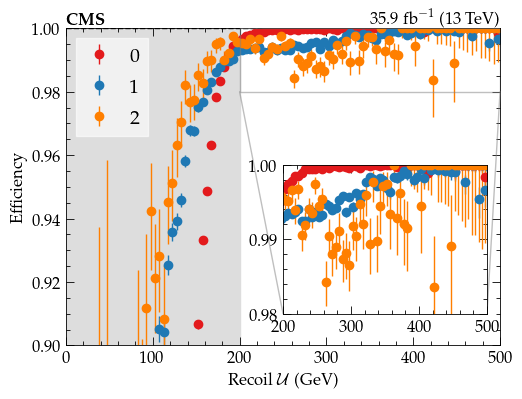

In [27]:
import matplotlib.pyplot as plt
plt.style.use("cms")
fig, ax = plt.subplots(figsize=(5.6, 4.2), dpi=100)

dftools.draw.cms_label(ax, "")
ax.set_xlabel('Recoil $\mathcal{U}$ (GeV)')
ax.set_ylabel('Efficiency')

ax.set_xlim(0., 500.)
ax.set_ylim(0.9, 1)

binvar = np.array(dff.loc[(0,),:].index.get_level_values("binvar0"))
binedge = np.array(list(binvar)+[2*binvar[-1]-binvar[-2]])
bincent = (binedge[1:] + binedge[:-1])/2.

ax.errorbar(
    bincent, dff.loc[(0,),"eff"].values,
    yerr=dff.loc[(0,),("eff_low", "eff_high")].values.T,
    color='#e31a1c', fmt='o', lw=1, label="0",
)
ax.errorbar(
    bincent, dff.loc[(1,),"eff"].values,
    yerr=dff.loc[(1,),("eff_low", "eff_high")].values.T,
    color='#1f78b4', fmt='o', lw=1, label="1",
)
ax.errorbar(
    bincent, dff.loc[(2,),"eff"].values,
    yerr=dff.loc[(2,),("eff_low", "eff_high")].values.T,
    color='#ff7f00', fmt='o', lw=1, label="2",
)

ax.axhline(1., lw=1, ls='--', color='black')
ax.axvspan(0.,200., color='#dddddd')
ax.legend(*ax.get_legend_handles_labels(), loc=2)

axins = ax.inset_axes([0.5, 0.1, 0.47, 0.47])
axins.errorbar(
    bincent, dff.loc[(0,),"eff"].values,
    yerr=dff.loc[(0,),("eff_low", "eff_high")].values.T,
    color='#e31a1c', fmt='o', lw=1, label="0",
)
axins.errorbar(
    bincent, dff.loc[(1,),"eff"].values,
    yerr=dff.loc[(1,),("eff_low", "eff_high")].values.T,
    color='#1f78b4', fmt='o', lw=1, label="1",
)
axins.errorbar(
    bincent, dff.loc[(2,),"eff"].values,
    yerr=dff.loc[(2,),("eff_low", "eff_high")].values.T,
    color='#ff7f00', fmt='o', lw=1, label="2",
)

axins.set_xlim(200, 500)
axins.set_ylim(0.98, 1)
#axins.set_xticklabels('')
#axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)

fig.savefig("plots/mettrigeff_METMHTnoMu_MET_METIsoTrack_METMHT_refmetdataset.pdf", format="pdf", bbox_inches="tight")

pass

In [28]:
dffs = []
for idx, label in enumerate(["SingleMuon", "DoubleMuon"]):
    df_total = dfrb.loc[
        ("central", "METnoX_pt", label, True, pd.IndexSlice[:], "SingleMuon"), :
    ].groupby(["binvar0"]).sum()
    
    df_pass = dfrb.loc[
        ("central", "METnoX_pt", label, True, True, "SingleMuon"), :
    ].groupby(["binvar0"]).sum()
    
    
    tdf = pd.DataFrame({"total": df_total["count"], "pass": df_pass["count"]})
    tdf["nmu"] = idx+1
    dffs.append(tdf)
dff = pd.concat(dffs).reset_index().set_index(["nmu", "binvar0"])

eff = dff["pass"].divide(dff["total"])
low, high = dftools.stats.fc_poisson_efficiency_interval(dff["total"], dff["pass"])
dff["eff"] = eff
dff["eff_low"] = eff-low
dff["eff_high"] = high-eff

dff.head(5)

total  pass       eff       eff_low  eff_high
nmu binvar0                                                
1   0.0        63.0   0.0  0.000000 -9.313226e-10  0.019806
    5.0       372.0   3.0  0.008065  5.094574e-03  0.006194
    10.0      954.0   3.0  0.003145  1.987319e-03  0.002413
    15.0     1752.0  12.0  0.006849  1.809376e-03  0.002451
    20.0     2673.0   9.0  0.003367  9.971460e-04  0.001418

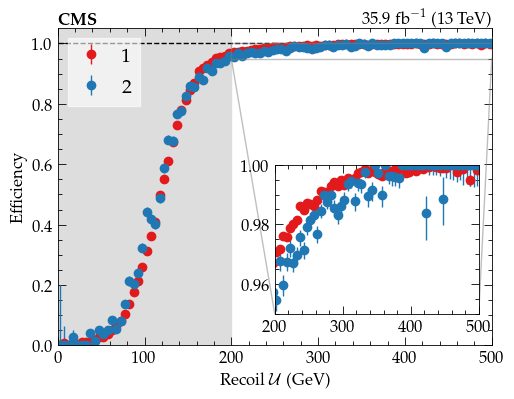

In [29]:
import matplotlib.pyplot as plt
plt.style.use("cms")
fig, ax = plt.subplots(figsize=(5.6, 4.2), dpi=100)

dftools.draw.cms_label(ax, "")
ax.set_xlabel('Recoil $\mathcal{U}$ (GeV)')
ax.set_ylabel('Efficiency')

ax.set_xlim(0., 500.)
ax.set_ylim(0., 1.05)

binvar = np.array(dff.loc[(1,),:].index.get_level_values("binvar0"))
binedge = np.array(list(binvar)+[2*binvar[-1]-binvar[-2]])
bincent = (binedge[1:] + binedge[:-1])/2.

ax.errorbar(
    bincent, dff.loc[(1,),"eff"].values,
    yerr=dff.loc[(1,),("eff_low", "eff_high")].values.T,
    color='#e31a1c', fmt='o', lw=1, label="1",
)

ax.errorbar(
    bincent, dff.loc[(2,),"eff"].values,
    yerr=dff.loc[(2,),("eff_low", "eff_high")].values.T,
    color='#1f78b4', fmt='o', lw=1, label="2",
)

ax.axhline(1., lw=1, ls='--', color='black')
ax.axvspan(0.,200., color='#dddddd')
ax.legend(*ax.get_legend_handles_labels(), loc=2)

axins = ax.inset_axes([0.5, 0.1, 0.47, 0.47])

axins.errorbar(
    bincent, dff.loc[(1,),"eff"].values,
    yerr=dff.loc[(1,),("eff_low", "eff_high")].values.T,
    color='#e31a1c', fmt='o', lw=1, label="1",
)
axins.errorbar(
    bincent, dff.loc[(2,),"eff"].values,
    yerr=dff.loc[(2,),("eff_low", "eff_high")].values.T,
    color='#1f78b4', fmt='o', lw=1, label="2",
)
axins.set_xlim(200, 500)
axins.set_ylim(0.95, 1)
#axins.set_xticklabels('')
#axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)
fig.savefig("plots/mettrigeff_METMHTnoMu_MET_METIsoTrack_METMHT_refIsoMu.pdf", format="pdf", bbox_inches='tight')

pass

In [30]:
dffs = []
for idx, label in enumerate(["SingleMuonMET", "DoubleMuonMET"]):
    df_total = dfrb.loc[
        ("central", "LeadMuonSelection_pt", label, True, pd.IndexSlice[:], "SingleMuon"), :
    ].groupby(["binvar0"]).sum()
    
    df_pass = dfrb.loc[
        ("central", "LeadMuonSelection_pt", label, True, True, "SingleMuon"), :
    ].groupby(["binvar0"]).sum()
    
    
    tdf = pd.DataFrame({"total": df_total["count"], "pass": df_pass["count"]})
    tdf["nmu"] = idx+1
    dffs.append(tdf)
dff = pd.concat(dffs).reset_index().set_index(["nmu", "binvar0"])

eff = dff["pass"].divide(dff["total"])
low, high = dftools.stats.fc_poisson_efficiency_interval(dff["total"], dff["pass"])
dff["eff"] = eff
dff["eff_low"] = eff-low
dff["eff_high"] = high-eff

dff.head(5)

total  pass  eff  eff_low  eff_high
nmu binvar0                                     
1   0.0        0.0   0.0  NaN      NaN       NaN
    5.0        0.0   0.0  NaN      NaN       NaN
    10.0       0.0   0.0  NaN      NaN       NaN
    15.0       0.0   0.0  NaN      NaN       NaN
    20.0       0.0   0.0  NaN      NaN       NaN

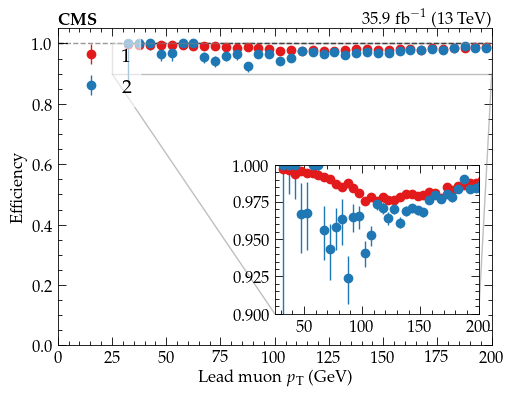

In [31]:
import matplotlib.pyplot as plt
plt.style.use("cms")
fig, ax = plt.subplots(figsize=(5.6, 4.2), dpi=100)

dftools.draw.cms_label(ax, "")
ax.set_xlabel('Lead muon $p_{\mathrm{T}}$ (GeV)')
ax.set_ylabel('Efficiency')

ax.set_xlim(0., 200.)
ax.set_ylim(0., 1.05)

binvar = np.array(dff.loc[(1,),:].index.get_level_values("binvar0"))
binedge = np.array(list(binvar)+[2*binvar[-1]-binvar[-2]])
bincent = (binedge[1:] + binedge[:-1])/2.

ax.errorbar(
    bincent, dff.loc[(1,),"eff"].values,
    yerr=dff.loc[(1,),("eff_low", "eff_high")].values.T,
    color='#e31a1c', fmt='o', lw=1, label="1",
)

ax.errorbar(
    bincent, dff.loc[(2,),"eff"].values,
    yerr=dff.loc[(2,),("eff_low", "eff_high")].values.T,
    color='#1f78b4', fmt='o', lw=1, label="2",
)

ax.axhline(1., lw=1, ls='--', color='black')
ax.legend(*ax.get_legend_handles_labels(), loc=2)

axins = ax.inset_axes([0.5, 0.1, 0.47, 0.47])

axins.errorbar(
    bincent, dff.loc[(1,),"eff"].values,
    yerr=dff.loc[(1,),("eff_low", "eff_high")].values.T,
    color='#e31a1c', fmt='o', lw=1, label="1",
)
axins.errorbar(
    bincent, dff.loc[(2,),"eff"].values,
    yerr=dff.loc[(2,),("eff_low", "eff_high")].values.T,
    color='#1f78b4', fmt='o', lw=1, label="2",
)
axins.set_xlim(25, 200)
axins.set_ylim(0.9, 1)
#axins.set_xticklabels('')
#axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)
fig.savefig("plots/mettrigeff_METMHTnoMu_MET_METIsoTrack_METMHT_refIsoMu_varLeadMuonSelectionPt.pdf", format="pdf", bbox_inches='tight')

pass